In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
health = pd.read_csv("heart.csv")
health.columns=health.columns.str.strip()

In [3]:
health.head

950

950

In [4]:
health.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
health.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
health.shape

(303, 14)

In [7]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
health.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Remove outliers 

In [10]:
ZScores = stats.zscore(health)
Threshold = 3
outliers = (ZScores > Threshold) | (ZScores < -Threshold)
new_data = health[~outliers.any(axis=1)]

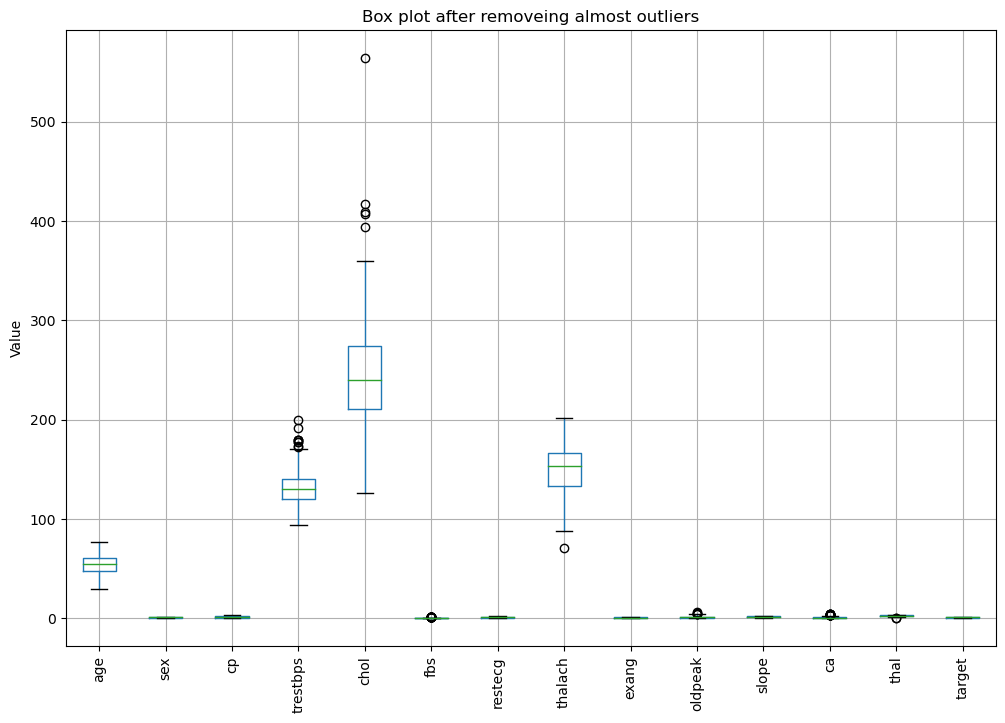

In [11]:
plt.figure(figsize=(12,8))
health.boxplot()
plt.title("Box plot after removeing almost outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

### Visualizing the features of dataset

<function matplotlib.pyplot.show(close=None, block=None)>

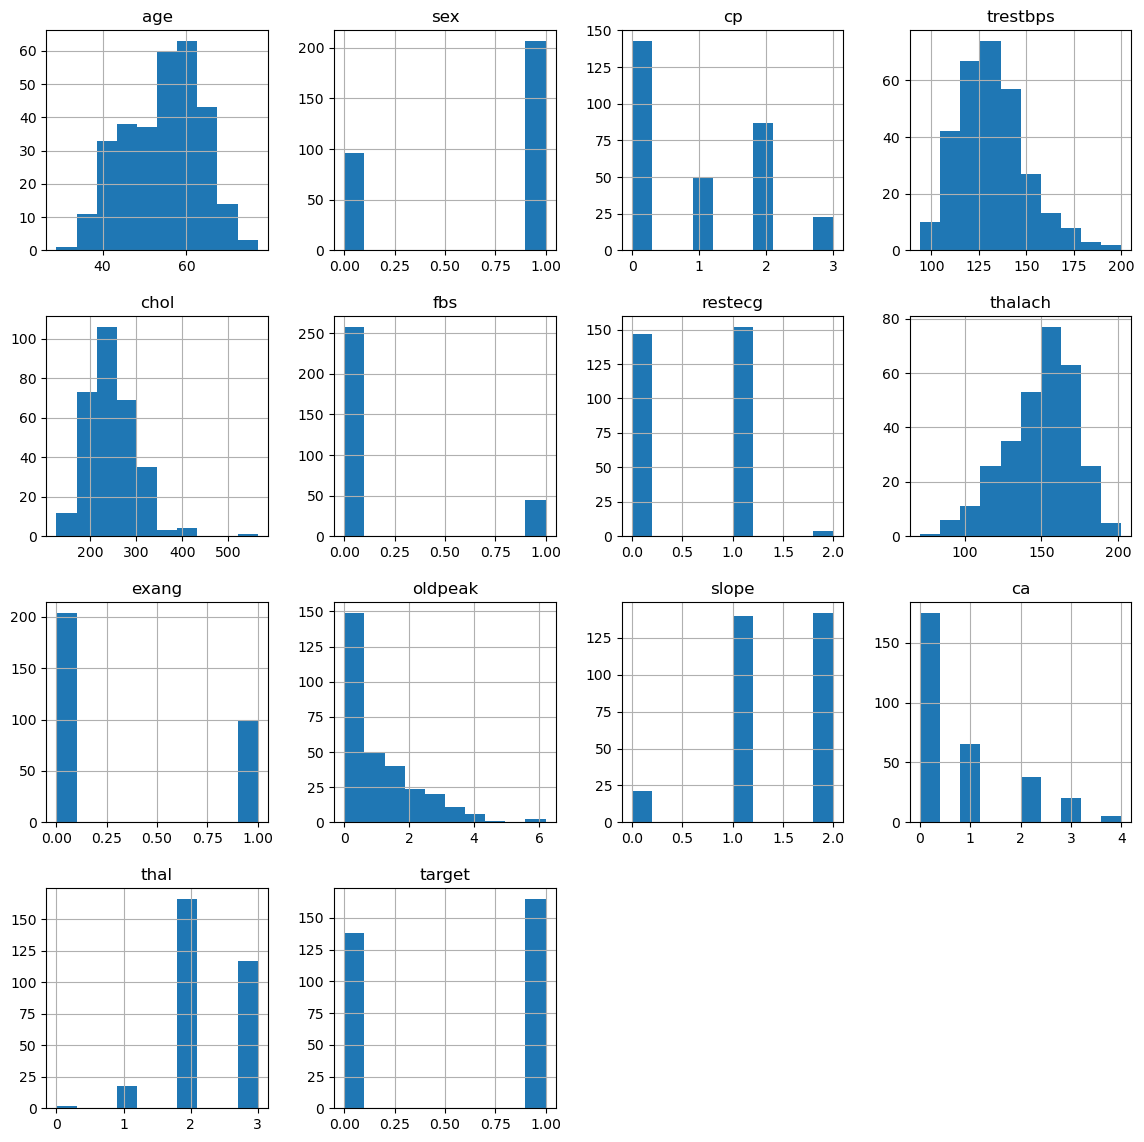

In [13]:
health.hist(figsize=(14,14))
plt.show

### Patient demographics

In [17]:
#count the number of patients for each gender
Gender = health['sex'].value_counts()
chestpain = health['cp'].value_counts()
heart_rate = health['exang'].value_counts()

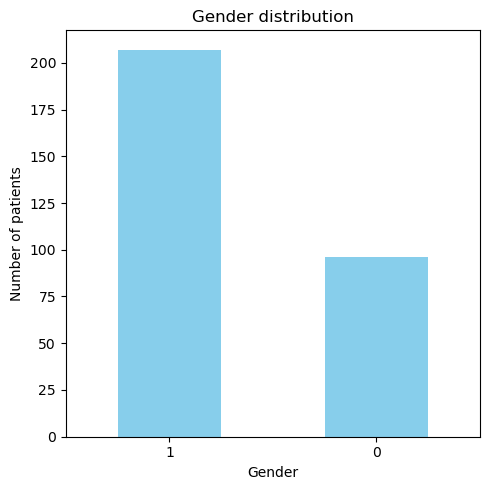

In [16]:
#Plot bar plots for each demographic Category
plt.figure(figsize=(5, 5))

#bar plot for gender distribution
Gender.plot(kind='bar',color='skyblue')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

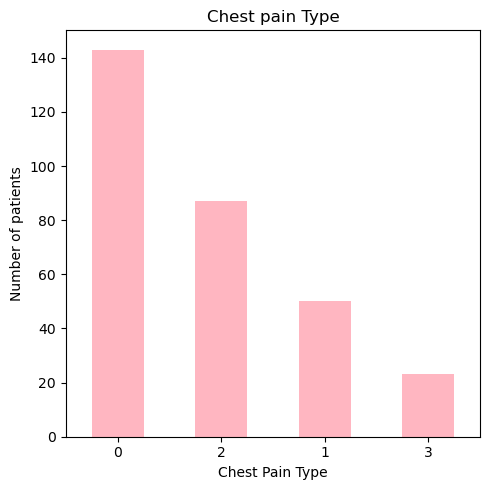

In [22]:
#Plot bar plots for each demographic Category
plt.figure(figsize=(5, 5))

#bar plot for gender distribution
chestpain.plot(kind='bar',color='lightpink')
plt.title('Chest pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of patients')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

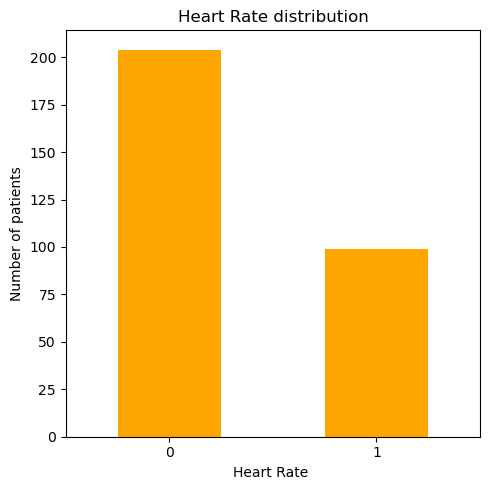

In [28]:
#Plot bar plots for each demographic Category
plt.figure(figsize=(5, 5))

#bar plot for gender distribution
heart_rate.plot(kind='bar',color='orange')
plt.title('Heart Rate distribution')
plt.xlabel('Heart Rate ')
plt.ylabel('Number of patients')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Analyze health metrics such as Blood Sugar, Cholesterol Levels 


In [ ]:
health.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

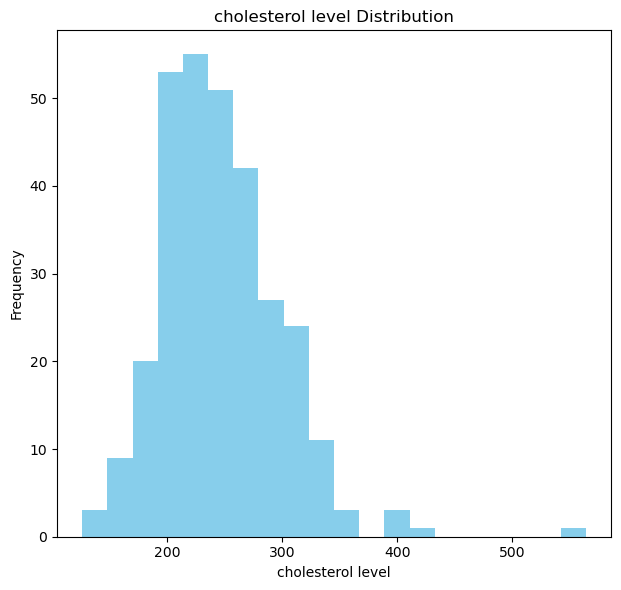

In [34]:
#Plot histograms for cholesterol levels 
plt.figure(figsize=(12,6))

#histogram for cholesterol levels
plt.subplot(1, 2, 2)
plt.hist(health['chol'], bins=20, color="skyblue")
plt.title('cholesterol level Distribution')
plt.xlabel("cholesterol level")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

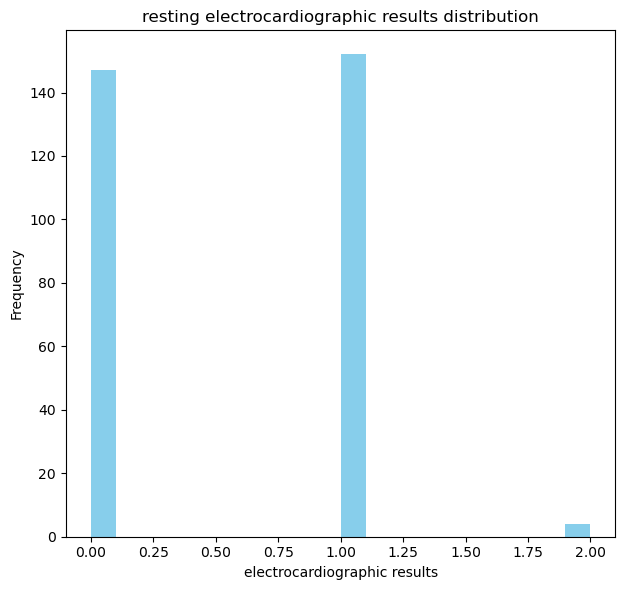

In [35]:
#Plot histograms for cholesterol levels 
plt.figure(figsize=(12,6))

#histogram for cholesterol levels
plt.subplot(1, 2, 2)
plt.hist(health['restecg'], bins=20, color="skyblue")
plt.title('resting electrocardiographic results distribution')
plt.xlabel("electrocardiographic results")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Disease Prevalence Rates

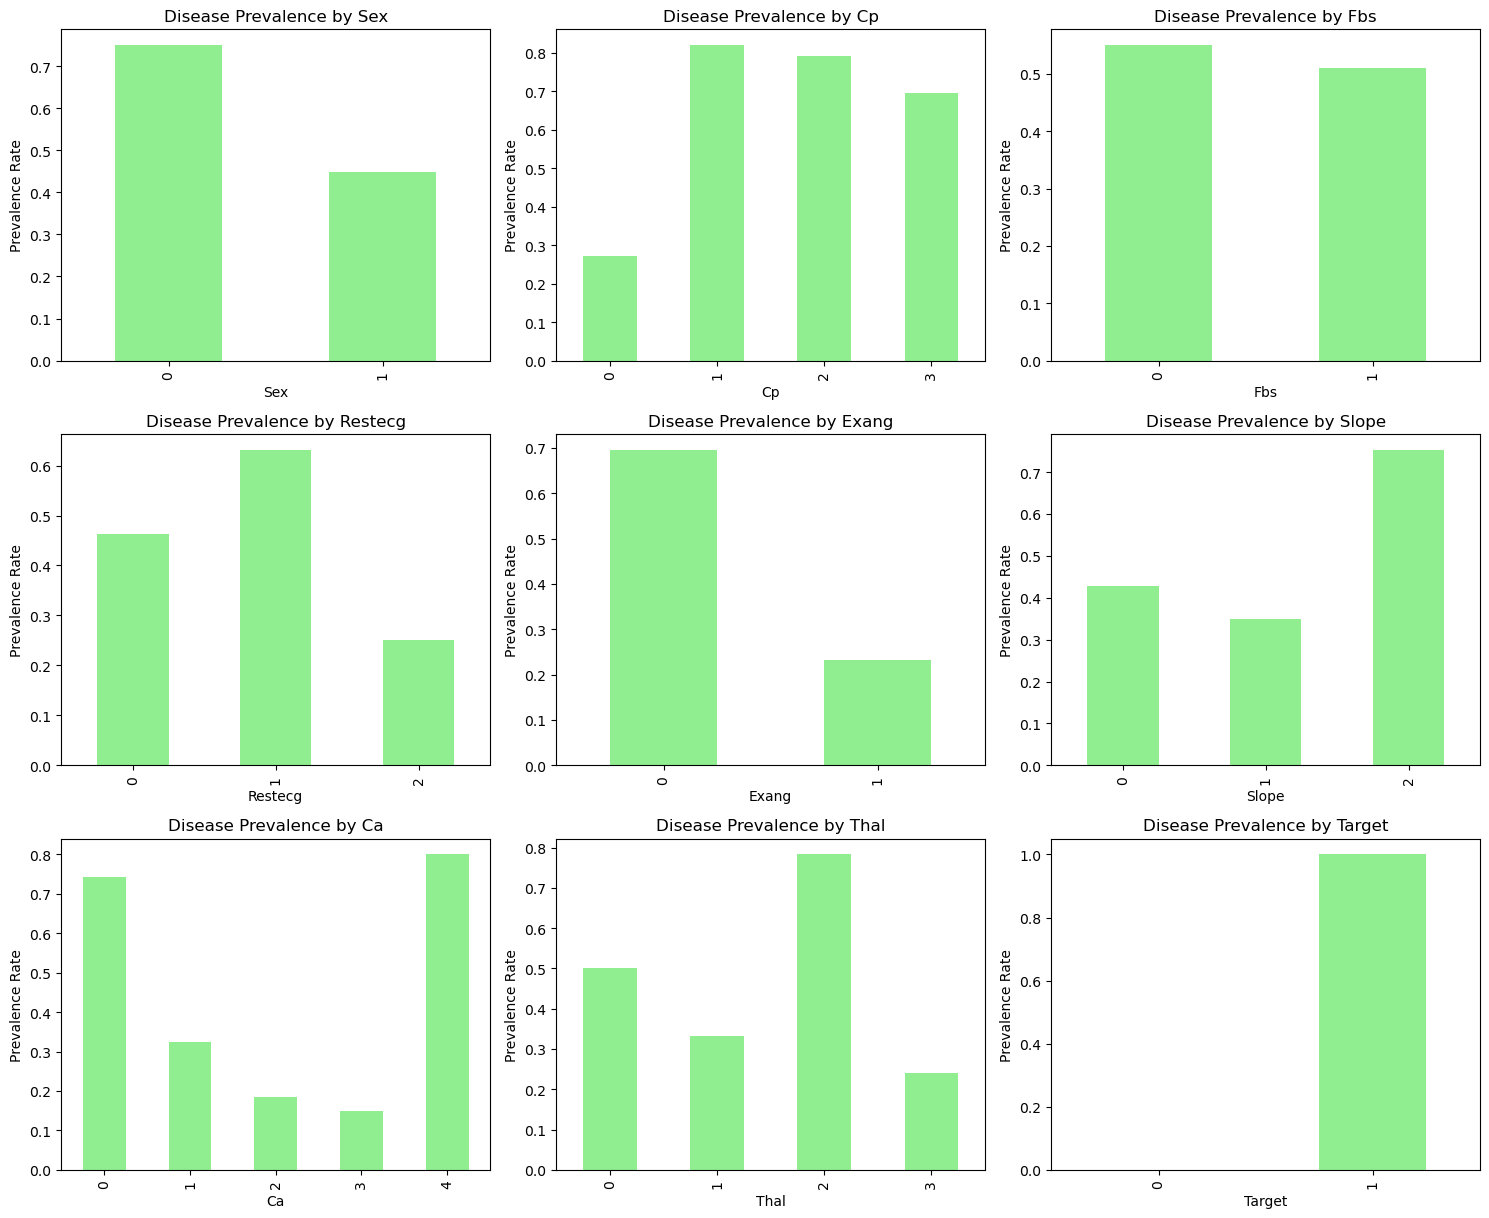

In [38]:
variables = ['sex', 'cp', 'fbs', 'restecg',
       'exang','slope', 'ca', 'thal', 'target']

plt.figure(figsize=(15,20))

for i, var in enumerate(variables, 1):
    plt.subplot(5, 3, i)
    #Calculate disease prevalence rates for each category in the variable
    prevalence_rates = health.groupby(var)['target'].mean().sort_index()

    #plot bar plot
    prevalence_rates.plot(kind='bar', color='lightgreen')
    plt.title(f'Disease Prevalence by {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Prevalence Rate')
    
plt.tight_layout()
plt.show()